In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('E:/VSCode/Python/Machine_Learning/Data/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Câu 1: Tiền xử lý dữ liệu: lựa chọn features, chia tập dữ liệu thành tập train và tập test.

In [5]:
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [9]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

C:\Users\HayXanhMan\AppData\Local\Temp\ipykernel_17348\286290913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)


In [10]:
data['horsepower'] = data['horsepower'].astype(int)

In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
print(data['origin'].value_counts())

origin
1    249
3     79
2     70
Name: count, dtype: int64


In [14]:
X = data.drop(['mpg', 'car name'], axis=1).values
y = data.iloc[:, :1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(318, 7) (80, 7)
(318, 1) (80, 1)


In [16]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
print(X_max.shape, X_min.shape)
print(X_max)
print(X_min)

(1, 7) (1, 7)
[[8.00e+00 4.55e+02 2.25e+02 5.14e+03 2.48e+01 8.20e+01 3.00e+00]]
[[3.000e+00 6.800e+01 4.600e+01 1.613e+03 8.000e+00 7.000e+01 1.000e+00]]


In [17]:
X_train_scaled = (X_train - X_min) / X_max
X_test_scaled = (X_test - X_min) / X_max

print(X_train_scaled.min(), X_train_scaled.max())
print(X_test_scaled.min(), X_test_scaled.max())

0.0 0.8505494505494505
0.0 0.8177777777777778


In [18]:
y_mean = y_train.mean(axis=0, keepdims=True)
y_std = y_train.std(axis=0, keepdims=True)

y_train_scaled = (y_train - y_mean) / y_std
y_test_scaled = (y_test - y_mean) / y_std

print(y_train_scaled.max(), y_train_scaled.min())
print(y_test_scaled.max(), y_test_scaled.min())

2.9037066357408845 -1.8449105240679904
2.5753448108604835 -1.7186175144986053


# Câu 2: Sử dụng thuật toán SGD để tìm các trọng số. Đánh giá mô hình RMSE, R2-score, MAE cho tập train và tập test.

In [19]:
class SGDRegressor:
    def __init__(self, learning_rate=0.001, epochs=1000, batch_size=32, tol=1e-3, detail=True):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.detail = detail
        self.tolerance = tol
        self.weights = None
        self.losses = []

    def predict(self, X):
        y_pred = np.dot(X, self.weights.T)
        return y_pred

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def grad(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        delta = y_pred - y_batch
        dw = np.dot(X_batch.T, delta) / X_batch.shape[0]
        return dw.T

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.zeros((1, X_with_bias.shape[1]))

        for epoch in range(self.epochs):
            indices = np.random.permutation(X_with_bias.shape[0])
            X_shuffled = X_with_bias[indices]
            y_shuffled = y[indices]

            for i in range(0, X_with_bias.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                dw = self.grad(X_batch, y_batch)
                self.weights -= self.learning_rate * dw

            y_pred = self.predict(X_with_bias)
            self.losses.append(self.mean_squared_error(y, y_pred))
            if epoch % 100 == 0 and self.detail:
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {epoch}: Loss {loss}")

            if np.linalg.norm(dw) < self.tolerance:
                print("Convergence reached.")
                break

def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_score_custom(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred)**2)
  ss_tot = np.sum((y_true - np.mean(y_true))**2)
  return 1 - (ss_res / ss_tot)

def mae(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))


In [20]:
# Khởi tạo model
sgd_regressor = SGDRegressor(0.01, 1000)

# Train model
sgd_regressor.fit(X_train_scaled, y_train_scaled)

# Dự đoán
y_train_pred_scaled = sgd_regressor.predict(np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled])
y_test_pred_scaled = sgd_regressor.predict(np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled])

# Đánh giá tập train
rmse_train = rmse(y_train_scaled, y_train_pred_scaled)
r2_train = r2_score_custom(y_train_scaled, y_train_pred_scaled)
mae_train = mae(y_train_scaled, y_train_pred_scaled)

# Đánh giá tập test
rmse_test = rmse(y_test_scaled, y_test_pred_scaled)
r2_test = r2_score_custom(y_test_scaled, y_test_pred_scaled)
mae_test = mae(y_test_scaled, y_test_pred_scaled)

print("\nTraining set:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R2-score: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")

print("\nTest set:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2-score: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")

Epoch 0: Loss 0.9768096898290526
Epoch 100: Loss 0.3521592078620969
Epoch 200: Loss 0.31797830259719695
Epoch 300: Loss 0.30917340166365964
Epoch 400: Loss 0.30290355090626114
Epoch 500: Loss 0.29763542767397466
Epoch 600: Loss 0.2929659498480891
Epoch 700: Loss 0.2887079419891962
Epoch 800: Loss 0.28476111207495536
Epoch 900: Loss 0.2810676250718496

Training set:
RMSE: 0.5269
R2-score: 0.7224
MAE: 0.3883

Test set:
RMSE: 0.4483
R2-score: 0.7656
MAE: 0.3531


Weights: [[ 0.83974965 -0.665091   -0.87453996 -0.98811781 -1.44651464  0.12082167
   1.24926908  0.52100214]]


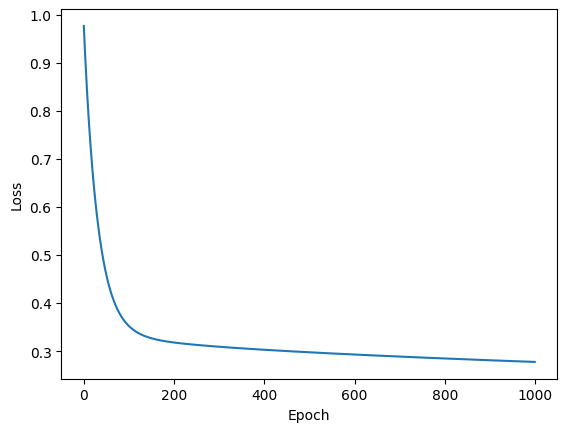

In [21]:
print(f"Weights: {sgd_regressor.weights}")
plt.plot(sgd_regressor.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Câu 3: Sử dụng thuật toán SGD với Norm2 regularization cho hệ số lambda = 0.1

In [22]:
class SGDRegressorWithNorm2:
    def __init__(self, learning_rate=0.001, epochs=1000, batch_size=32, tol=1e-3, lambda_reg=0.1, detail=True):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.tolerance = tol
        self.detail = detail
        self.lambda_reg = lambda_reg
        self.weights = None
        self.losses = []

    def predict(self, X):
        y_pred = np.dot(X, self.weights.T)
        return y_pred

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def grad(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        delta = y_pred - y_batch
        dw = np.dot(X_batch.T, delta) / X_batch.shape[0] + self.lambda_reg * self.weights.T
        return dw.T

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        self.weights = np.zeros((1, X_with_bias.shape[1]))

        for epoch in range(self.epochs):
            indices = np.random.permutation(X_with_bias.shape[0])
            X_shuffled = X_with_bias[indices]
            y_shuffled = y[indices]

            for i in range(0, X_with_bias.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                dw = self.grad(X_batch, y_batch)
                self.weights -= self.learning_rate * dw

            y_pred = self.predict(X_with_bias)
            self.losses.append(self.mean_squared_error(y, y_pred))
            if epoch % 100 == 0 and self.detail:
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {epoch}: Loss {loss}")

            if np.linalg.norm(dw) < self.tolerance:
                print("Convergence reached.")
                break

In [23]:
# Khởi tạo model
sgd_regressor_norm2 = SGDRegressorWithNorm2(learning_rate=0.1, epochs=200, lambda_reg=0.1)

# Train model
sgd_regressor_norm2.fit(X_train_scaled, y_train_scaled)

# Dự đoán
y_train_pred_scaled_norm2 = sgd_regressor_norm2.predict(np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled])
y_test_pred_scaled_norm2 = sgd_regressor_norm2.predict(np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled])

# Đánh giá tập train
rmse_train_norm2 = rmse(y_train_scaled, y_train_pred_scaled_norm2)
r2_train_norm2 = r2_score_custom(y_train_scaled, y_train_pred_scaled_norm2)
mae_train_norm2 = mae(y_train_scaled, y_train_pred_scaled_norm2)

# Đánh giá tập test
rmse_test_norm2 = rmse(y_test_scaled, y_test_pred_scaled_norm2)
r2_test_norm2 = r2_score_custom(y_test_scaled, y_test_pred_scaled_norm2)
mae_test_norm2 = mae(y_test_scaled, y_test_pred_scaled_norm2)

print("\nTraining set with Norm2:")
print(f"RMSE: {rmse_train_norm2:.4f}")
print(f"R2-score: {r2_train_norm2:.4f}")
print(f"MAE: {mae_train_norm2:.4f}")

print("\nTest set with Norm2:")
print(f"RMSE: {rmse_test_norm2:.4f}")
print(f"R2-score: {r2_test_norm2:.4f}")
print(f"MAE: {mae_test_norm2:.4f}")

Epoch 0: Loss 0.8157402527572813
Epoch 100: Loss 0.4222418755991851

Training set with Norm2:
RMSE: 0.6504
R2-score: 0.5770
MAE: 0.5082

Test set with Norm2:
RMSE: 0.5498
R2-score: 0.6476
MAE: 0.4150


Weights: [[ 0.33990697 -0.52107854 -0.60888207 -0.44060809 -0.49579064  0.24625735
   0.19679586  0.55138146]]


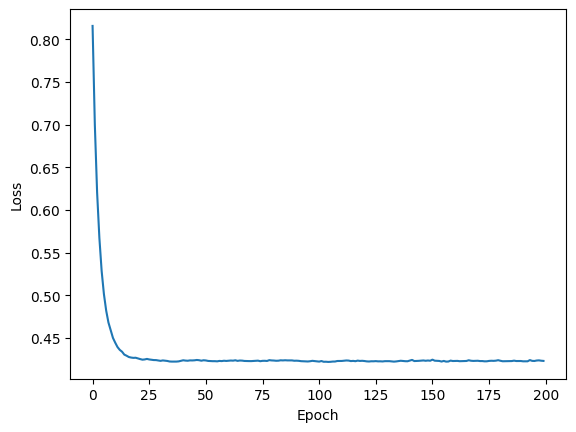

In [24]:
print(f"Weights: {sgd_regressor_norm2.weights}")

plt.plot(sgd_regressor_norm2.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Câu 4: Vẽ đồ thị sự phụ thuộc của train error và test error vào lambda.

C:\Users\HayXanhMan\AppData\Local\Temp\ipykernel_17348\1479238319.py:17: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
C:\Users\HayXanhMan\AppData\Local\Temp\ipykernel_17348\1479238319.py:22: RuntimeWarning: overflow encountered in multiply
  dw = np.dot(X_batch.T, delta) / X_batch.shape[0] + self.lambda_reg * self.weights.T
C:\Users\HayXanhMan\AppData\Local\Temp\ipykernel_17348\1479238319.py:39: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * dw


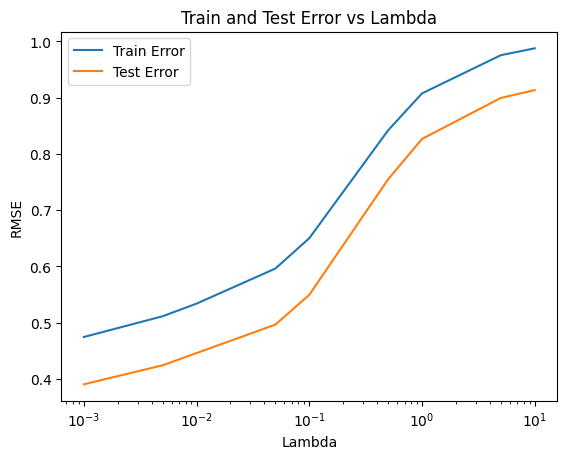

In [25]:
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
train_errors = []
test_errors = []

for lmbda in lambdas:
    sgd_regressor_norm2 = SGDRegressorWithNorm2(0.1, 500, lambda_reg=lmbda, detail=False)
    sgd_regressor_norm2.fit(X_train_scaled, y_train_scaled)
    y_train_pred_scaled_norm2 = sgd_regressor_norm2.predict(np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled])
    y_test_pred_scaled_norm2 = sgd_regressor_norm2.predict(np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled])

    rmse_train_norm2 = rmse(y_train_scaled, y_train_pred_scaled_norm2)
    rmse_test_norm2 = rmse(y_test_scaled, y_test_pred_scaled_norm2)

    train_errors.append(rmse_train_norm2)
    test_errors.append(rmse_test_norm2)

plt.plot(lambdas, train_errors, label='Train Error')
plt.plot(lambdas, test_errors, label='Test Error')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Train and Test Error vs Lambda')
plt.legend()
plt.xscale('log')
plt.show()



## Nhận xét:
1. Train Error:
  - Khi &lambda; thấp, kết quả train error cho lại khá tốt và ổn định.
  - Khi &lambda; tăng, train error tăng đần. Có thể &lambda; lớn hơn thì dẫn tới hiện tượng mô hình bị underfitting. Biểu hiện bằng sự tăng mạnh của train error.
2. Test Error:
  - Tương tự với train error, test error duy trì ổn định và thấp ở các giá trị &lambda; thấp.
  - Khi tăng &lambda;, test error cũng bắt đầu tăng lên, cho thấy mô hình bắt đầu bị underfitting.
3. Hiệu suất tốt nhất:
  - Điểm lý tưởng cho cả hai train error và test error xuất hiện ở giá trị &lambda; thấp trong khoảng 10<sup>-3</sup> đến 10<sup>-2</sup>. Cho thấy lượng nhỏ &lambda; giúp ngăn chăn overfitting và giúp mô hình học tập từ dữ liệu hiện quả.
4. Kết luận
  - &lambda; nhỏ giúp cải thiện hiệu suất của mô hình, nhưng nếu &lambda; qua lớn có thê dẫn tới mô hình bị underfitting.

# Câu 5: Vẽ đồ thị sự phụ thuộc của các trọng số vào lambda.

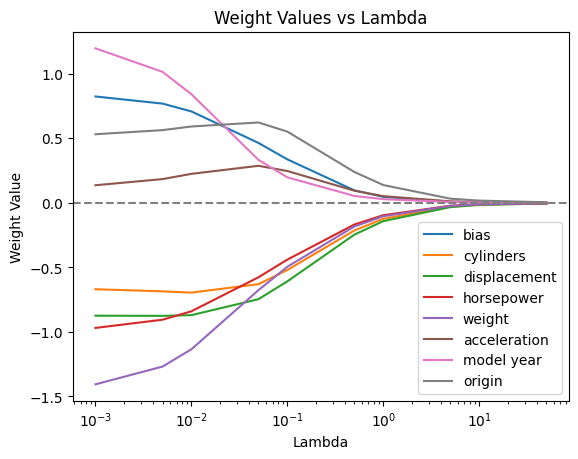

In [26]:
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]
labels = ['bias', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
weights_list = []

for lmbda in lambdas:
    sgd_regressor_norm2 = SGDRegressorWithNorm2(0.02, 500, lambda_reg=lmbda, detail=False)
    sgd_regressor_norm2.fit(X_train_scaled, y_train_scaled)
    weights_list.append(sgd_regressor_norm2.weights)

for i in range(weights_list[0].shape[1]):
    weights_for_feature = [w[0, i] for w in weights_list]
    plt.plot(lambdas, weights_for_feature, label=labels[i])

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Lambda')
plt.ylabel('Weight Value')
plt.title('Weight Values vs Lambda')
plt.legend()
plt.xscale('log')
plt.show()


## Nhận xét:
1. Ảnh hưởng của &lambda; lên trọng số:
  - Khi &lambda; nhỏ, các trọng số của mô hình có các giá trị khác biệt với nhau và các đặc trung này vẫn đóng góp nhiều và mô hình,
  - Khi &lambda; quá lớn thì giá trị của các giá trị trọng số dần đi về 0. Điều này cho thấy &lambda; tăng thì trọng số dần không đóng gón được nhiều cho mô hình nữa. Dẫn đến mô hình dần trở nên đơn giản hơn.
2. Sự thay đổi các trọng số:
  - Biến origin và weight có hệ số lớn nhất khi &lambda; nhỏ nhưng giảm về 0 nhanh khi Lambda tăng.
  - Biến origin và acceleration có sự tăng dần khi &lambda tăng dần đến 10<sup>-1</sup> và giảm dần về 0 khi &lambda; tăng lên.
  - Các biến khác cũng đều có xu hướng giảm dần về 0 khi &lambda; tăng lên.
3. Độ phức tạp của mô hình.
  - Với &lambda; nhỏ, mô hình có những trọng số lớn, dẫn tới các đặc trưng sẽ ảnh hưởng mạnh mẽ tới việc dự đoán. Điều này dẫn tới một mô hình phức tạp hơn.
  - Với &lambda; lớn, các trọng số tiến dần về 0, kiến cho các trọng số giảm dần ảnh hưởng tới kết quả dự đoán. Dẫn tới mô hình trở nên đơn giản hơn.
4. Kết luận
  - Khi tăng &lambda; dẫn đến các trọng số giảm, kết quả dự đoán dần ít ảnh hưởng tới các đặc trưng đầu vào. Sẽ làm cho mo hình tránh tình trạng Overfitting nhưng có thể gây ra Underfitting nếu &lambda; quá lớn.
  - Khi &lambda; nhỏ, mô hình cho phép các trọng số đóng góp lớn vào dự đoán. Mô hình trở nên phức tạp và có khả năng bị Overfitting.
  - Khi &lambda; lớn, các trọng số đóng góp vào dự đoán không được quá nhiều. Mô hình trở nên quá đơn giản và nguy cơ cao bị Underfitting.